In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
IMAGE_SIZE=[224,224]

In [3]:
train_path='Datasets/Train'
test_path='Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# don't train existing weights
for layer in tqdm(vgg.layers):
  layer.trainable = False

100%|██████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


In [6]:
  # useful for getting number of classes
folders = glob('Datasets/Train/*')

In [7]:
len(folders)

4

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('Datasets/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 20 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8 images belonging to 4 classes.


In [ ]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1.8453 - accuracy: 0.2500 - val_loss: 2.0540 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 7s 7s/step - loss: 1.8409 - accuracy: 0.7000 - val_loss: 1.9185 - val_accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 1.6403 - accuracy: 0.7500 - val_loss: 1.3644 - val_accuracy: 0.6250
Epoch 4/5
1/1 [==============================] - 8s 8s/step - loss: 0.9686 - accuracy: 0.7500 - val_loss: 0.6441 - val_accuracy: 0.8750
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 0.2713 - accuracy: 0.8500 - val_loss: 0.4091 - val_accuracy: 1.0000


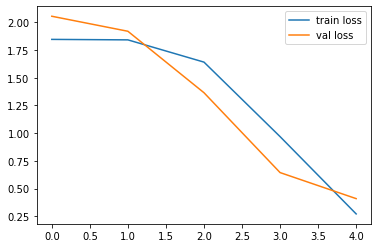

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [21]:
r.history

{'val_loss': [2.053999662399292,
  1.9185211658477783,
  1.3643534183502197,
  0.644123911857605,
  0.4091390371322632],
 'val_accuracy': [0.5, 0.75, 0.625, 0.875, 1.0],
 'loss': [1.845277190208435,
  1.840945839881897,
  1.6402629613876343,
  0.9685535430908203,
  0.2712724208831787],
 'accuracy': [0.25, 0.7, 0.75, 0.75, 0.85]}

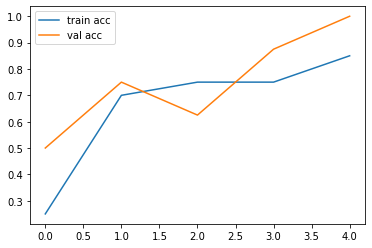

<Figure size 432x288 with 0 Axes>

In [22]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
import tensorflow as tf
from keras.models import load_model
model.save('facefeatures_new_model.h5')